In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
spam_ham_data = pd.read_csv('/content/combined_data.csv')

In [3]:
spam_ham_data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
#checking the duplicate values
spam_ham_data.duplicated().sum()

np.int64(0)

In [5]:
#missing values
spam_ham_data.isnull().sum()

,0
label,0
text,0


In [6]:
### checking the target variable
spam_ham_data['label'].value_counts(normalize=True)

,proportion
label,
1,0.53135
0,0.46865


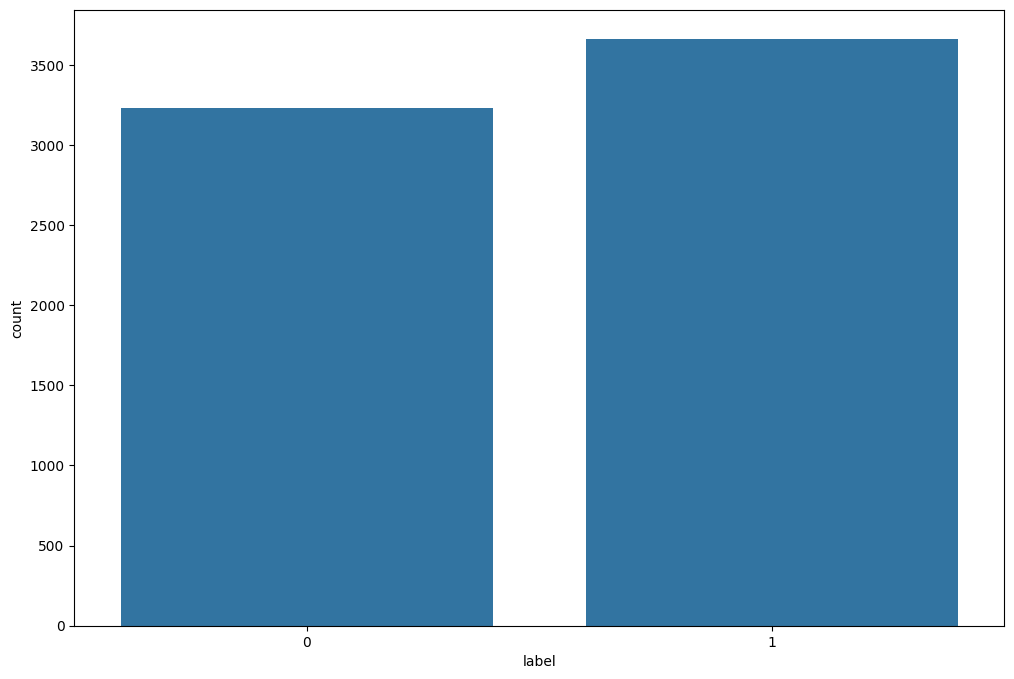

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(data=spam_ham_data,x='label')
plt.show()

In [8]:
lemmat = WordNetLemmatizer().lemmatize
stemming = PorterStemmer().stem

In [9]:
sw = stopwords.words('english')

In [10]:
## cleaning the texts by removing unnecessar characters
def clean_text(txt):
  pattrn = r'[^a-zA-Z0-9]+'
  text = re.sub(pattrn, ' ', txt)
  text = [stemming(word) for word in word_tokenize(text) if word not in sw]
  text_str  = ' '.join(text)
  return text_str


In [11]:
spam_ham_data['cleaned_lemmatized_text'] = spam_ham_data['text'].apply(lambda x:clean_text(x))

In [12]:
spam_ham_data.shape

(6890, 3)

In [13]:
spam_ham_data.head()

,label,text,cleaned_lemmatized_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,thank answer guy know check rsync manual would...


In [14]:
## lets check the lenght of the min and max text
spam_ham_data['text_len'] = spam_ham_data['text'].apply(len)

In [15]:
spam_ham_data['text_len'].min()

1

In [16]:
spam_ham_data['text_len'].max()

178837

In [17]:
#lets check the most repeated words in a spam and ham emails
## most repeated words in spam emails
cv = CountVectorizer()
spam_data = spam_ham_data[spam_ham_data['label']==1]
spam_data.head()
words_vec = cv.fit_transform(spam_data['cleaned_lemmatized_text'])
words_vec
sum_words = words_vec.sum(axis=0)
words_freq = [(words_vec,sum_words[0,i]) for words_vec,i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
spam_words_df = pd.DataFrame(words_freq, columns=['words','freq'])
spam_words_df.head()

,words,freq
0,escapenumb,30494
1,escapelong,13426
2,com,2970
3,pill,2758
4,per,2735


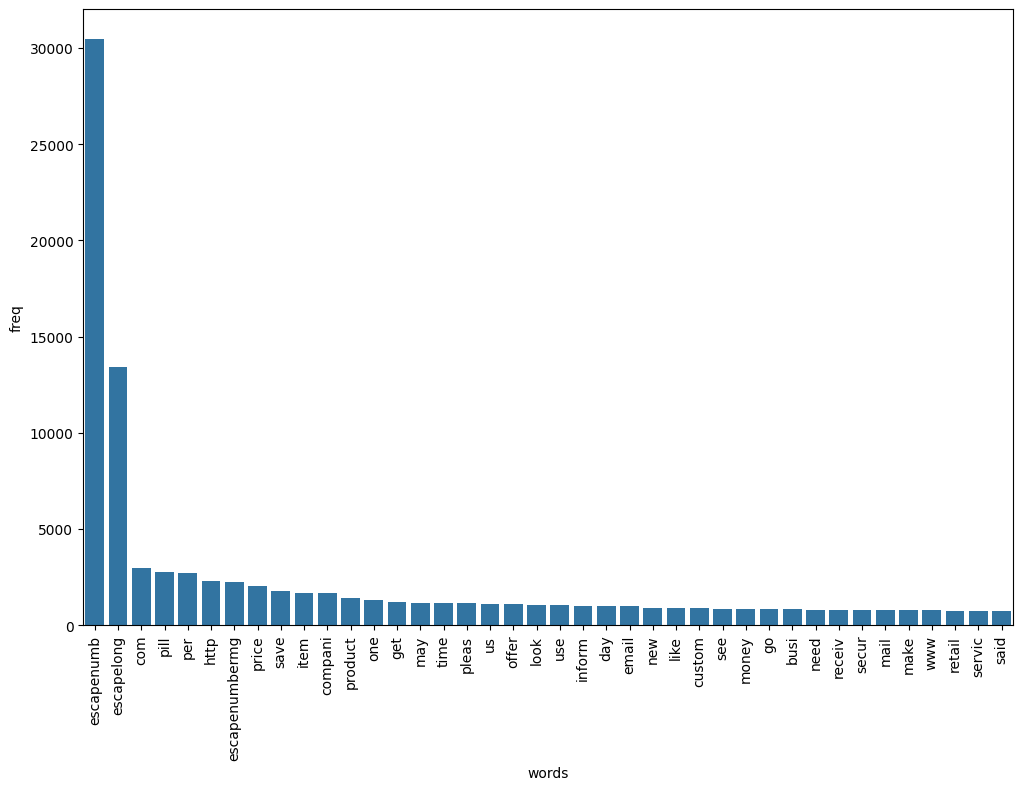

In [18]:
##Plottoing the msot repeated words
plt.figure(figsize=(12,8))
sns.barplot(data=spam_words_df[0:40:],x='words',y='freq')
plt.xticks(rotation=90)
plt.show()

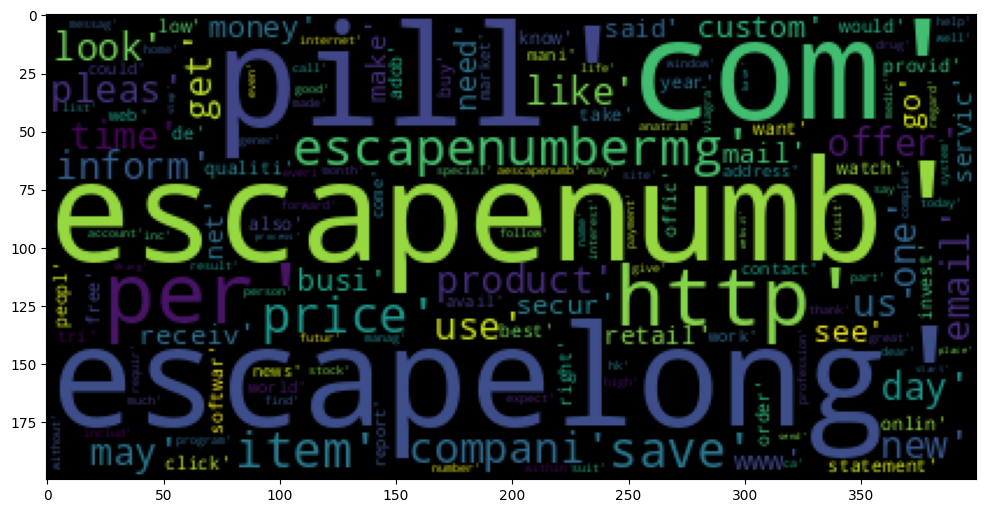

In [19]:
from wordcloud import WordCloud

plt.figure(figsize=(12,8))
words_ = dict(zip(spam_words_df['words'], spam_words_df['freq']))
wc = WordCloud().generate(str(words_))
plt.imshow(wc)
plt.show()

In [20]:
## lets see the most repeated words in a ham text
ham_data = spam_ham_data[spam_ham_data['label']==0]
ham_data.head()

,label,text,cleaned_lemmatized_text,text_len
2,0,computer connection from cnn com wednesday es...,comput connect cnn com wednesday escapenumb ma...,2235
4,0,thanks for all your answers guys i know i shou...,thank answer guy know check rsync manual would...,1362
5,0,larry king live at escapenumber escapenumber p...,larri king live escapenumb escapenumb p et fri...,2076
6,0,michael pobega wrote i'm not sure if it's the ...,michael pobega wrote sure mpl mozilla allow di...,598
7,0,hi i have this error tr sample escapenumber es...,hi error tr sampl escapenumb escapenumb escape...,755


In [21]:
###
cv = CountVectorizer()
words_vec2 = cv.fit_transform(ham_data['cleaned_lemmatized_text'])
words_vec2
sum_words = words_vec2.sum(axis=0)

words_freq_ham = [(words,sum_words[0,i]) for words,i in cv.vocabulary_.items()]
words_freq_ham = sorted(words_freq_ham, key = lambda x:x[1], reverse=True)
ham_words_df = pd.DataFrame(words_freq_ham, columns=['words','freq'])
ham_words_df.head()

,words,freq
0,escapenumb,70153
1,http,5495
2,org,4186
3,enron,4079
4,com,3259


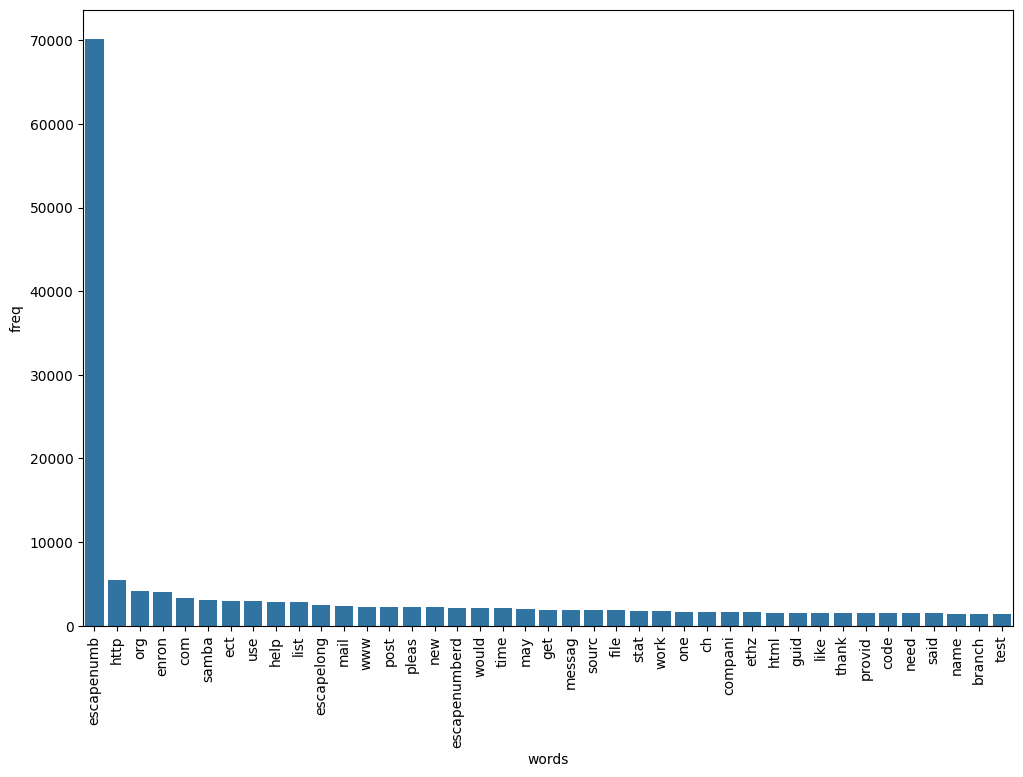

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(data=ham_words_df[0:41:], x='words',y='freq')
plt.xticks(rotation=90)
plt.show()

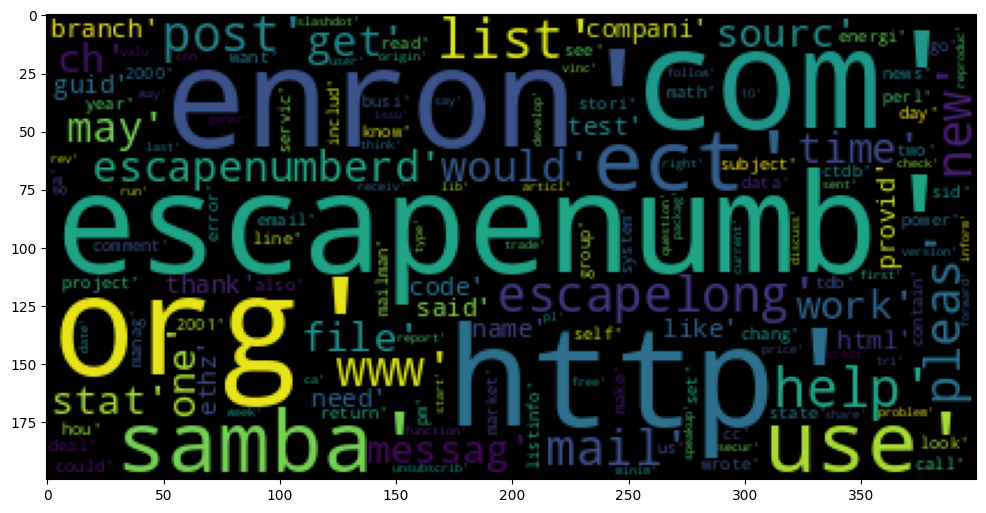

In [23]:
ham_words1 = dict(zip(ham_words_df['words'], ham_words_df['freq']))
plt.figure(figsize=(12,8))
wc = WordCloud().generate(str(ham_words1))
plt.imshow(wc)
plt.show()

In [26]:
x = spam_ham_data['cleaned_lemmatized_text']
y = spam_ham_data['label']

In [28]:
from sklearn.model_selection import  train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf= tfidf.transform(x_test)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [32]:
naive_bayes = MultinomialNB()
multi_nb = naive_bayes.fit(x_train_tfidf,y_train)
multi_nb

MultinomialNB()

In [33]:
##predict
y_train_pred = multi_nb.predict(x_train_tfidf)
y_test_pred = multi_nb.predict(x_test_tfidf)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       646
           1       0.96      0.96      0.96       732

    accuracy                           0.96      1378
   macro avg       0.96      0.96      0.96      1378
weighted avg       0.96      0.96      0.96      1378



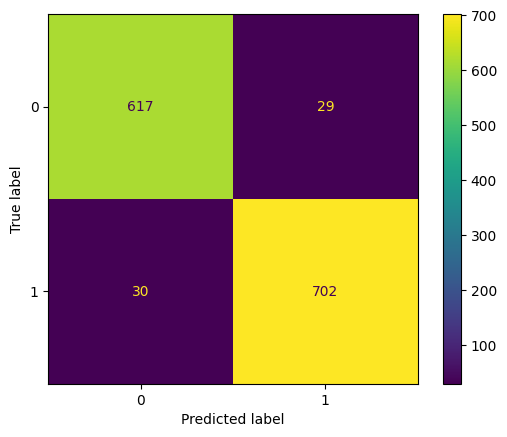

In [36]:
##evaluate
cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))
cmd